1- Importing the required packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [4]:
df = pd.read_csv("E-Scooter_Trips_-_2020.csv",parse_dates=['Start Time','End Time'])

In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630816 entries, 0 to 630815
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Trip ID                      630816 non-null  object        
 1   Start Time                   630816 non-null  datetime64[ns]
 2   End Time                     630816 non-null  datetime64[ns]
 3   Trip Distance                630816 non-null  object        
 4   Trip Duration                630816 non-null  object        
 5   Vendor                       630816 non-null  object        
 6   Start Community Area Number  629934 non-null  float64       
 7   End Community Area Number    629598 non-null  float64       
 8   Start Community Area Name    629934 non-null  object        
 9   End Community Area Name      629598 non-null  object        
 10  Start Centroid Latitude      629934 non-null  float64       
 11  Start Centroid Longitude  

(630816, 16)

In [6]:
df.head()

,Trip ID,Start Time,End Time,Trip Distance,Trip Duration,Vendor,Start Community Area Number,End Community Area Number,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location
0,3eb9a2a3-3266-4559-b1ec-e83a6f7972ab,2020-08-12 05:00:00,2020-08-12 05:00:00,"1,153","1,027",spin,68.0,68.0,ENGLEWOOD,ENGLEWOOD,41.780068,-87.642266,POINT (-87.64226608 41.78006847),41.780068,-87.642266,POINT (-87.64226608 41.78006847)
1,82dd7b8f-8de0-4f25-829b-b32bf47e8419,2020-08-12 05:00:00,2020-08-12 05:00:00,17,91,spin,22.0,21.0,LOGAN SQUARE,AVONDALE,41.922903,-87.704301,POINT (-87.70430082 41.92290349),41.939283,-87.710757,POINT (-87.71075685 41.93928256)
2,9120cbf3-f749-49b6-b894-0e6e065cd731,2020-08-12 05:00:00,2020-08-12 05:00:00,"2,883",724,spin,3.0,6.0,UPTOWN,LAKE VIEW,41.965435,-87.655145,POINT (-87.65514456 41.96543532),41.943514,-87.657498,POINT (-87.65749768 41.9435138)
3,cf2e4abc-2649-49be-924b-468a1aefc4c8,2020-08-12 05:00:00,2020-08-12 05:00:00,5,21,spin,31.0,31.0,LOWER WEST SIDE,LOWER WEST SIDE,41.848335,-87.675179,POINT (-87.67517932 41.84833501),41.848335,-87.675179,POINT (-87.67517932 41.84833501)
4,0448afb5-ab64-4090-b528-e3050e7eb0f2,2020-08-12 07:00:00,2020-08-12 07:00:00,"1,179",245,spin,6.0,6.0,LAKE VIEW,LAKE VIEW,41.943514,-87.657498,POINT (-87.65749768 41.9435138),41.943514,-87.657498,POINT (-87.65749768 41.9435138)


In [7]:
print(df.duplicated().value_counts())
print(df.nunique())


False    630816
dtype: int64
Trip ID                        630816
Start Time                       2274
End Time                         2444
Trip Distance                   22270
Trip Duration                    9226
Vendor                              3
Start Community Area Number        77
End Community Area Number          77
Start Community Area Name          77
End Community Area Name            77
Start Centroid Latitude            77
Start Centroid Longitude           77
Start Centroid Location            77
End Centroid Latitude              77
End Centroid Longitude             77
End Centroid Location              77
dtype: int64


In [8]:
df['Trip Distance'] = df['Trip Distance'].str.replace(",","").astype('int')
df['Trip Duration'] = df['Trip Duration'].str.replace(",","").astype('int')

In [9]:
print(df.head())

                                Trip ID          Start Time  \
0  3eb9a2a3-3266-4559-b1ec-e83a6f7972ab 2020-08-12 05:00:00   
1  82dd7b8f-8de0-4f25-829b-b32bf47e8419 2020-08-12 05:00:00   
2  9120cbf3-f749-49b6-b894-0e6e065cd731 2020-08-12 05:00:00   
3  cf2e4abc-2649-49be-924b-468a1aefc4c8 2020-08-12 05:00:00   
4  0448afb5-ab64-4090-b528-e3050e7eb0f2 2020-08-12 07:00:00   

             End Time  Trip Distance  Trip Duration Vendor  \
0 2020-08-12 05:00:00           1153           1027   spin   
1 2020-08-12 05:00:00             17             91   spin   
2 2020-08-12 05:00:00           2883            724   spin   
3 2020-08-12 05:00:00              5             21   spin   
4 2020-08-12 07:00:00           1179            245   spin   

   Start Community Area Number  End Community Area Number  \
0                         68.0                       68.0   
1                         22.0                       21.0   
2                          3.0                        6.0   
3   

In [10]:
df = df.drop(df[(df['Trip Duration'] < 90) | (df['Trip Distance'] < 100)].index).reset_index()
df.shape

(553747, 17)

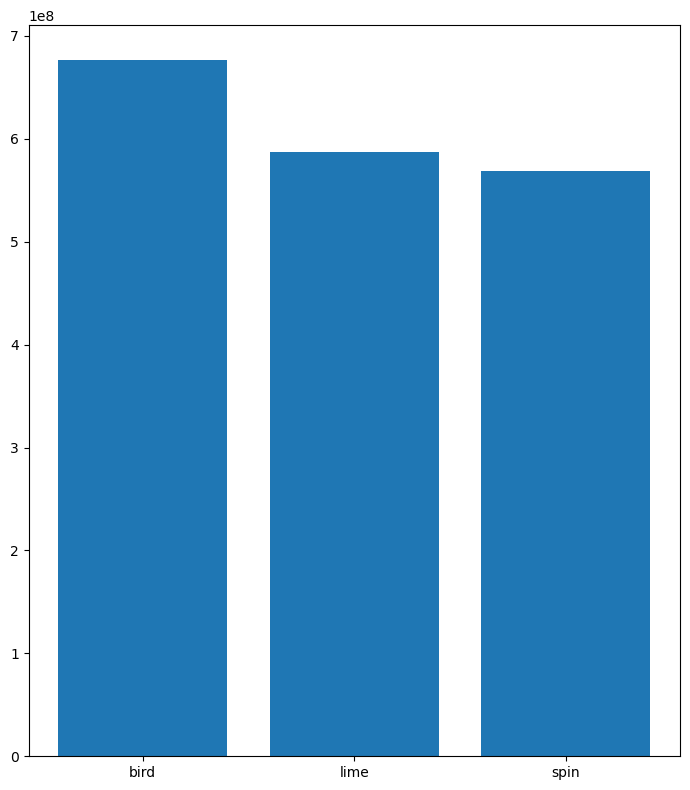

  Vendor  Trip Distance
0   bird      676573919
1   lime      586837135
2   spin      569165410


In [11]:
df_by_vendor = df.groupby('Vendor')['Trip Distance'].sum().reset_index()
plt.figure(figsize=(7,8))
plt.bar(df_by_vendor['Vendor'],df_by_vendor['Trip Distance'])
plt.tight_layout()
plt.show()
print(df_by_vendor)

In [12]:
weekends =[]
for i in range(0,len(df['Start Time'])):
    if df['Start Time'][i].day_name() in ["Saturday" , "Sunday"]:
        weekends.append(df['Start Time'][i].date())


In [13]:
list(set(weekends))


[datetime.date(2020, 12, 5),
 datetime.date(2020, 10, 11),
 datetime.date(2020, 10, 17),
 datetime.date(2020, 12, 12),
 datetime.date(2020, 11, 1),
 datetime.date(2020, 9, 19),
 datetime.date(2020, 8, 23),
 datetime.date(2020, 8, 22),
 datetime.date(2020, 8, 30),
 datetime.date(2020, 9, 13),
 datetime.date(2020, 10, 31),
 datetime.date(2020, 8, 29),
 datetime.date(2020, 10, 24),
 datetime.date(2020, 11, 29),
 datetime.date(2020, 12, 6),
 datetime.date(2020, 11, 7),
 datetime.date(2020, 10, 4),
 datetime.date(2020, 10, 18),
 datetime.date(2020, 9, 5),
 datetime.date(2020, 9, 27),
 datetime.date(2020, 11, 15),
 datetime.date(2020, 11, 28),
 datetime.date(2020, 9, 20),
 datetime.date(2020, 10, 25),
 datetime.date(2020, 11, 14),
 datetime.date(2020, 11, 22),
 datetime.date(2020, 9, 12),
 datetime.date(2020, 10, 10),
 datetime.date(2020, 11, 8),
 datetime.date(2020, 8, 16),
 datetime.date(2020, 8, 15),
 datetime.date(2020, 9, 26),
 datetime.date(2020, 10, 3),
 datetime.date(2020, 9, 6),
 da

ValueError: Could not convert object to NumPy datetime

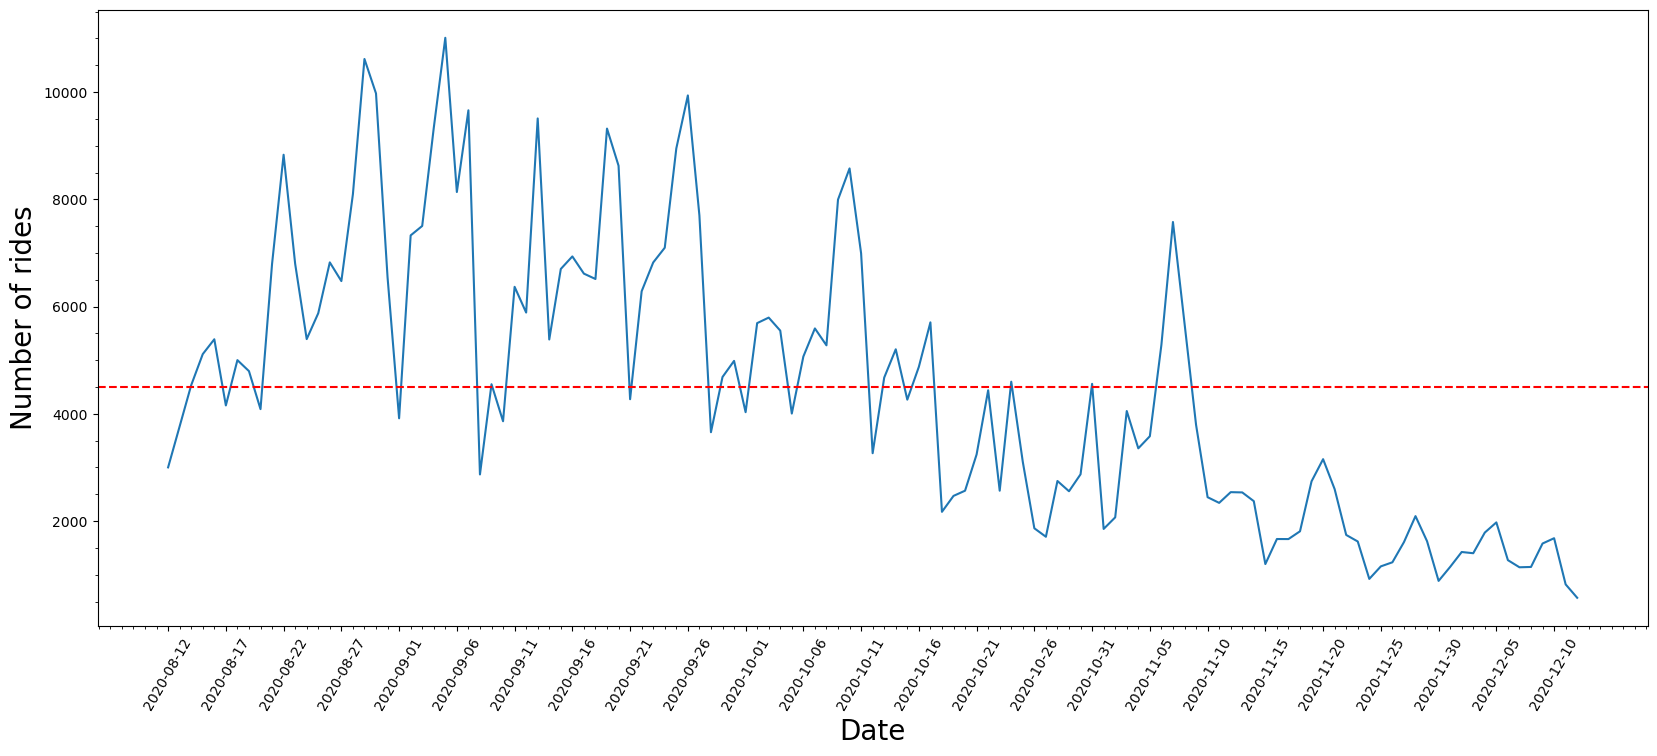

In [15]:
start_date =df['Start Time'].dt.date
df_by_date = df.groupby(start_date)['Trip ID'].count().reset_index()
plt.rcParams["figure.figsize"] = (20,8)
fig , ax= plt.subplots()
ax.plot(df_by_date['Start Time'],df_by_date['Trip ID'])
plt.xticks(np.arange(min(df_by_date['Start Time']),max(df_by_date['Start Time']),5),rotation=60)
plt.xlabel("Date",size=20)
plt.ylabel("Number of rides",size=20)
plt.axhline(df_by_date['Trip ID'].mean(),color='red',ls='--',label="Average rides")
plt.minorticks_on()
ax.set_xticks(np.arange(start_date,dt.date(2020,12,10),7),minor=True)
ax.grid(visible=True,axis='x',color='red',ls='--',which='minor')
plt.show()


In [16]:
df[['Trip Duration','Trip Distance']].describe()

,Trip Duration,Trip Distance
count,553747.000000,553747.000000
mean,1094.621607,3309.411092
std,1398.702112,3796.754407
min,90.000000,100.000000
25%,371.000000,1187.000000
50%,643.000000,2187.000000
75%,1226.000000,4010.000000
max,204182.000000,49997.000000


In [17]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day'] = df['Start Time'].dt.day_name()
df_by_day = df.groupby(['Vendor','Day']).count().reset_index()
print(df_by_day)


   Vendor        Day  index  Trip ID  Start Time  End Time  Trip Distance  \
0    bird     Friday  25818    25818       25818     25818          25818   
1    bird     Monday  18765    18765       18765     18765          18765   
2    bird   Saturday  28802    28802       28802     28802          28802   
3    bird     Sunday  24446    24446       24446     24446          24446   
4    bird   Thursday  20466    20466       20466     20466          20466   
5    bird    Tuesday  17130    17130       17130     17130          17130   
6    bird  Wednesday  20581    20581       20581     20581          20581   
7    lime     Friday  39706    39706       39706     39706          39706   
8    lime     Monday  25736    25736       25736     25736          25736   
9    lime   Saturday  48413    48413       48413     48413          48413   
10   lime     Sunday  38741    38741       38741     38741          38741   
11   lime   Thursday  32633    32633       32633     32633          32633   

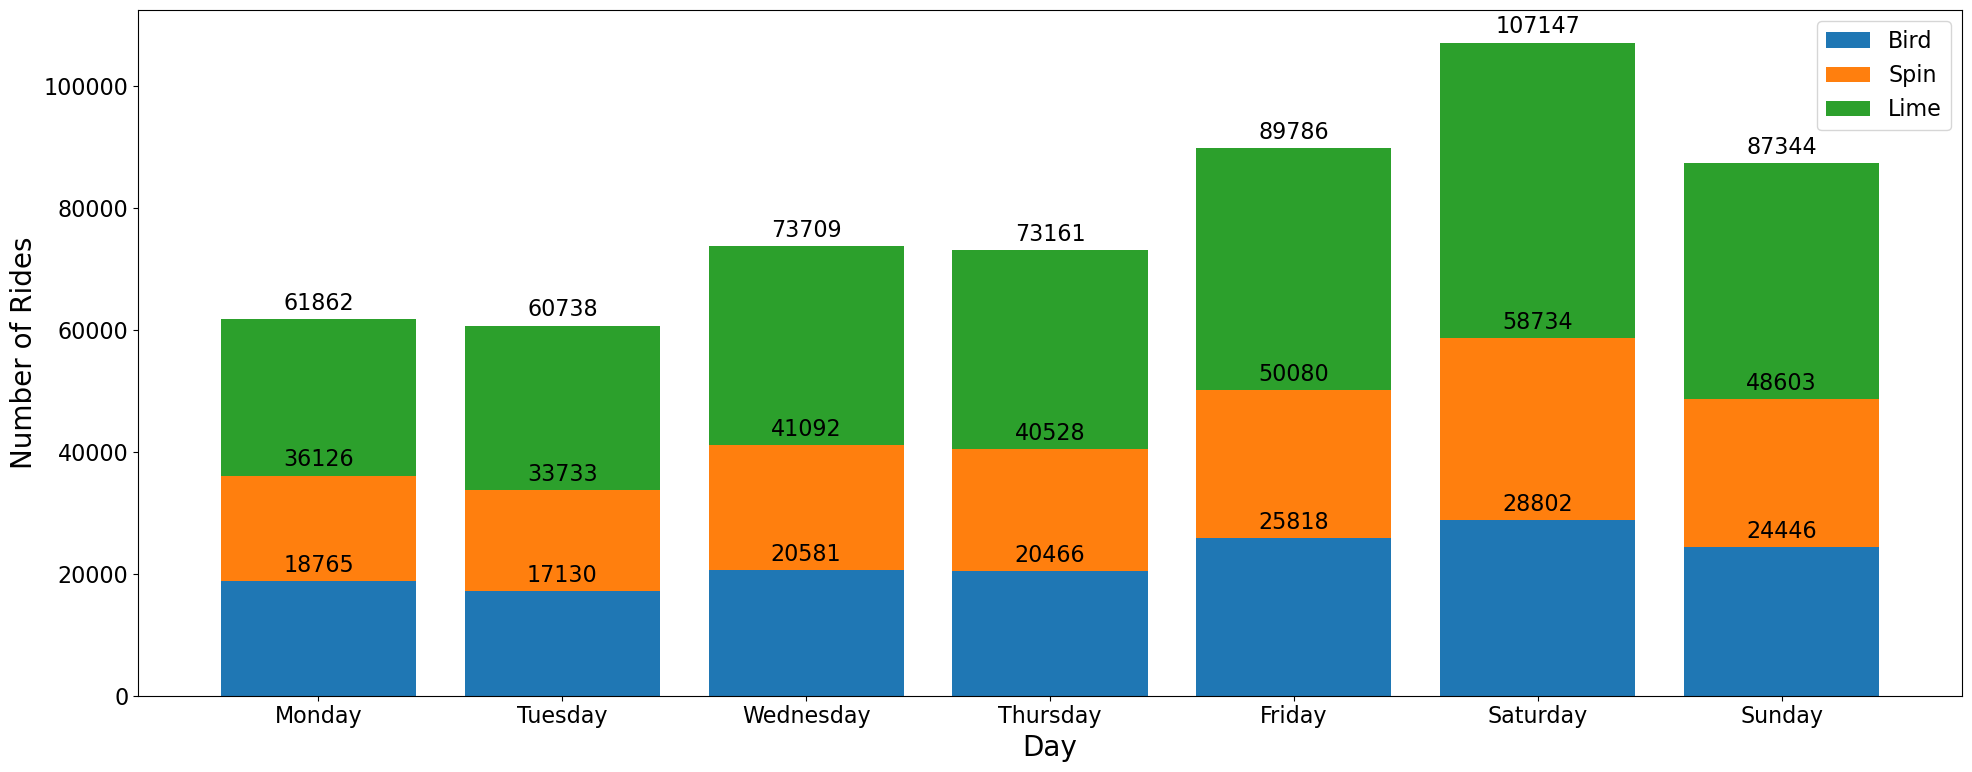

In [18]:
plt.rcParams.update({'font.size': 16})
fig,ax=plt.subplots()
bird = df_by_day[df_by_day['Vendor']=='bird'].set_index('Day').reindex(days).reset_index()
lime = df_by_day[df_by_day['Vendor']=='lime'].set_index('Day').reindex(days).reset_index()
spin = df_by_day[df_by_day['Vendor']=='spin'].set_index('Day').reindex(days).reset_index()
bird_bar = ax.bar(bird['Day'],bird['Trip ID'],label='Bird')
spin_bar = ax.bar(spin['Day'],spin['Trip ID'],label='Spin',bottom=bird['Trip ID'])
lime_bar = ax.bar(lime['Day'],lime['Trip ID'],label='Lime',bottom=np.array(spin['Trip ID'])+np.array(bird['Trip ID']))
ax.set_ylabel("Number of Rides",size=20)
ax.set_xlabel("Day",size=20)
ax.bar_label(bird_bar, padding=3)
ax.bar_label(spin_bar, padding=3)
ax.bar_label(lime_bar, padding=3)
ax.legend()
fig.tight_layout()
plt.show()

In [ ]:
df['Hour'] = df['Start Time'].dt.hour
df_by_hour = df.groupby('Hour')['Trip ID'].count().reset_index()
df_by_hour

In [ ]:
sns.barplot(data=df_by_hour,x='Hour',y='Trip ID')
plt.show()